In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Bikes.csv")

## viewing top 5 rows of the dataset

In [3]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


## Informatiion of the file

In [4]:
df.info()
#In my dataset (32648, 8) rows and columns.
#there are 4 float numbers and 4 object data,size of my data set is 261184
#there is no null value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


## Most of bikes used first owners  bikes 

<AxesSubplot:xlabel='owner', ylabel='count'>

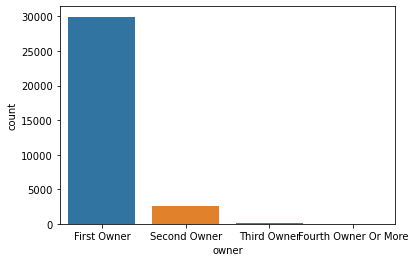

In [5]:
sns.countplot(x='owner',data=df) #count the values

## Discription of the file

In [6]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


## Viewing nan values

In [7]:
df.isna().sum()
# there is no null value

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

## Heres the most common brands  which is used

In [8]:
df['brand'].value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
LML                    1
Yezdi                  1
Name: brand, dtype: int64

In [9]:
df['bike_name'].value_counts()

Bajaj Pulsar 150cc                                   2776
Bajaj Avenger Street 220                             2531
Bajaj Avenger 220cc                                  2060
Royal Enfield Classic 350cc                          1673
Hero Passion Pro 100cc                               1432
                                                     ... 
Indian Chief Classic 1800cc                             1
TVS Apache RTR 160cc White Race Edition Rear Disc       1
Triumph Bonneville T100 900cc                           1
Bajaj CT110 ES Alloy                                    1
Yamaha FZS FI 150cc Special Edition                     1
Name: bike_name, Length: 471, dtype: int64

In [10]:
#df["normalized-losses"].replace("?",np.nan,inplace=True)

In [11]:
df["price"]=df["price"].astype(int)

In [12]:
n_median=df["price"].median()

In [13]:
#df["normalized-losses"].fillna(n_median,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  int32  
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(3), int32(1), object(4)
memory usage: 1.9+ MB


## This brand is used to maximum peoples

In [15]:
df['brand'].value_counts().idxmax()

'Bajaj'

## This brand is used to minimum peoples

In [16]:
df['brand'].value_counts().idxmin()

'Rajdoot'

## This bike used max people

In [17]:
df['bike_name'].value_counts().idxmax()

'Bajaj Pulsar 150cc'

In [18]:
df['bike_name'].value_counts().idxmin()

'Mahindra Pantero 110cc'

## Relation bet 

In [19]:
df.corr().style.background_gradient()

,price,kms_driven,age,power
price,1.000000,-0.313955,-0.399133,0.862376
kms_driven,-0.313955,1.000000,0.484684,-0.264016
age,-0.399133,0.484684,1.000000,-0.337035
power,0.862376,-0.264016,-0.337035,1.000000


## Representation of top 5 brand which is used mostly  

<AxesSubplot:ylabel='brand'>

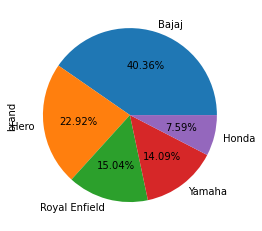

In [20]:
df.brand.value_counts().head().plot(kind="pie", autopct="%.2f%%")

## Most common cities which is used most of peoples

In [21]:
df['city'].value_counts()

Delhi            7318
Bangalore        2723
Mumbai           2591
Hyderabad        2160
Pune             1724
                 ... 
Surendranagar       1
Khandela            1
Mohammadabad        1
Shimla              1
Sidhi               1
Name: city, Length: 443, dtype: int64

<AxesSubplot:xlabel='brand'>

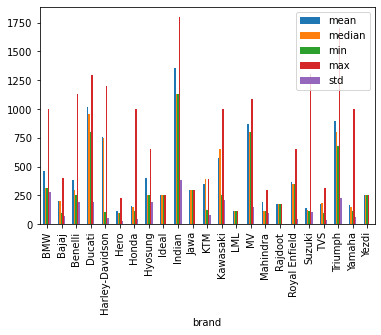

In [22]:
#max powerfull brand is indian 
df.groupby("brand")["power"].agg(["mean","median","min","max","std"]).plot(kind="bar")


<AxesSubplot:ylabel='Frequency'>

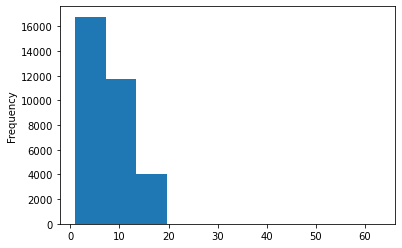

In [23]:
df["age"].plot(kind="hist")

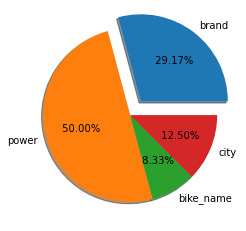

In [24]:
x = [7, 12, 2, 3] # 24 hrs
act = ["brand","power","bike_name","city"]
plt.pie(x, autopct="% .2f%%",labels=act, shadow=True, explode=(0.2,0,0,0))
plt.show()

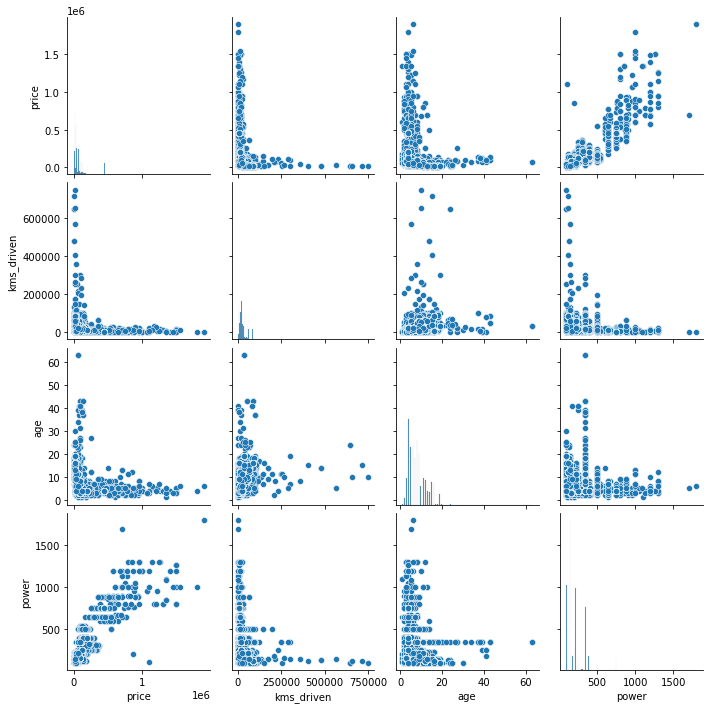

In [25]:
# here using pairplot to show the relation
sns.pairplot(df)

In my project, I have analyse the bikes, and I concluded most common brand name is 
“Bajaj” which is use 40.36% Peoples. And them brand “Hero” is used 22.92%.then “Royal Enfield” 
used 15.04%. then “Yamaha” use 14.09%. then ”Honda” i.e 7.59%. and minimum peoples prefer the 
brand i.e “Rajdoot” brand.Outoff that Most of the bikes prefer First Oweners. 
After the analysis we analyse the top brand which is used base on power.